Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

In [4]:
bike_df = pd.read_json('bike_df')
yelp_df = pd.read_json('yelp_df')

In [8]:
# Calculate restaurant count for each station ID
restaurant_count = yelp_df['Station ID'].value_counts().reset_index()
restaurant_count.columns = ['Station ID', 'Restaurant Count']

# Merge restaurant count with bike_df
bike_df = pd.merge(bike_df, restaurant_count, on='Station ID', how='left')

C:\Users\chloe\AppData\Local\Temp/ipykernel_42760/1493352062.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Restaurant Count_x'} in the result is deprecated and will raise a MergeError in a future version.
  bike_df = pd.merge(bike_df, restaurant_count, on='Station ID', how='left')


In [9]:
# Calculate average rating for each station ID
average_rating = yelp_df.groupby('Station ID')['Rating'].mean().reset_index()
average_rating.columns = ['Station ID', 'Average Rating']

# Merge average rating with bike_df
bike_df = pd.merge(bike_df, average_rating, on='Station ID', how='left')

# Print the updated bike_df DataFrame
bike_df

,Station ID,Name,Latitude,Longitude,Number of Bikes,Restaurant Count_x,Restaurant Count_y,Restaurant Count_x,Restaurant Count_y,Average Rating
0,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,0,10,10,10,10,3.85
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Primrose Ave / Davenport Rd,43.671420,-79.445947,3,10,10,10,10,4.30
2,a09c67c0b419654d907c9134b108e328,Queen St. E / Rhodes Ave.,43.666224,-79.317693,1,10,10,10,10,3.95
3,d6a9daee68070a8b106cfb598d81308c,Bond St / Queen St E,43.653236,-79.376716,12,10,10,10,10,4.15
4,8f8af40d9388c8a3962559e8681d3db7,Church St / Alexander St,43.663722,-79.380288,7,10,10,10,10,4.10
...,...,...,...,...,...,...,...,...,...,...
96,a7ca61373064c6581461132f1ae050de,Broadview Ave / Westwood Ave,43.684865,-79.356602,22,10,10,10,10,4.15
97,62a1c39596c3d512dfa04f1d29b81035,Fulton Ave / Pape Ave,43.683950,-79.347046,3,10,10,10,10,4.10
98,b960be1eba97f5aefc6ad39ecc93cb11,Cosburn Ave / Donlands Ave,43.690537,-79.341307,5,10,10,10,10,4.00
99,908b17c0d06011373777bace0a3cd74c,Beltline Trail / Chaplin Cres.,43.704461,-79.423122,8,10,10,10,10,4.00


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

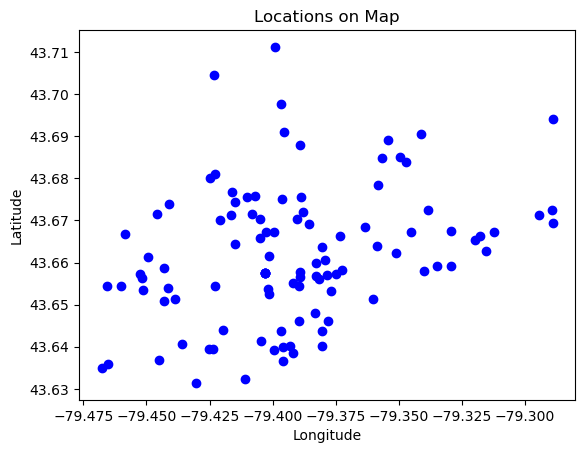

In [23]:
import matplotlib.pyplot as plt

# Iterate over the rows of the DataFrame
for index, row in merged_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude_x']

    # Plot the location on the map
    plt.scatter(longitude, latitude, marker='o', color='blue')

# Set the title and labels
plt.title('Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.